<a href="https://colab.research.google.com/github/sam19980822/3rd-ML100Days/blob/master/HW_Day099_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os
%matplotlib inline

In [0]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [0]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

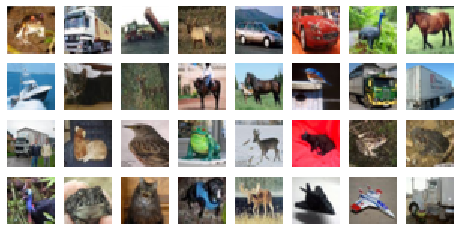

In [21]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [0]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

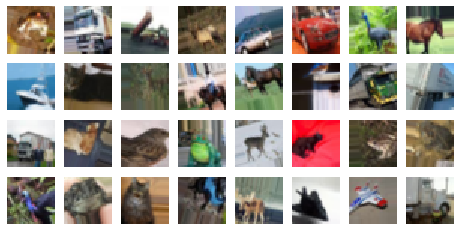

In [23]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

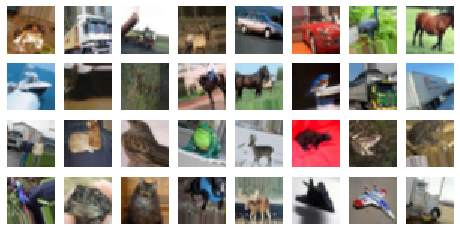

In [24]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業
### 請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [26]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 對 label 進行 one-hot encoding (y_trian 原本是純數字)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
50000 train samples
10000 test samples


In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [28]:
model_org = Sequential()
model_org.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_org.add(Activation('relu'))
model_org.add(Conv2D(32, (3, 3)))
model_org.add(Activation('relu'))
model_org.add(MaxPooling2D(pool_size=(2, 2)))
model_org.add(Dropout(0.25))

model_org.add(Conv2D(64, (3, 3), padding='same'))
model_org.add(Activation('relu'))
model_org.add(Conv2D(64, (3, 3)))
model_org.add(Activation('relu'))
model_org.add(MaxPooling2D(pool_size=(2, 2)))
model_org.add(Dropout(0.25))

model_org.add(Flatten())
model_org.add(Dense(512))
model_org.add(Activation('relu'))
model_org.add(Dropout(0.5))
model_org.add(Dense(num_classes))
model_org.add(Activation('softmax'))
model_org.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model_org.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=optimizer)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

In [30]:
model_org.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

score_org = model_org.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_org[0])
print('Test accuracy:', score_org[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.2911 - acc: 0.1199 - val_loss: 2.2853 - val_acc: 0.1177
Epoch 2/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.2773 - acc: 0.1312 - val_loss: 2.2652 - val_acc: 0.1442
Epoch 3/25
50000/50000 [==============================] - 4s 77us/step - loss: 2.2533 - acc: 0.1458 - val_loss: 2.2265 - val_acc: 0.1885
Epoch 4/25
50000/50000 [==============================] - 4s 77us/step - loss: 2.2047 - acc: 0.1782 - val_loss: 2.1560 - val_acc: 0.2460
Epoch 5/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.1370 - acc: 0.2090 - val_loss: 2.0654 - val_acc: 0.2592
Epoch 6/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.0792 - acc: 0.2271 - val_loss: 2.0181 - val_acc: 0.2733
Epoch 7/25
50000/50000 [==============================] - 4s 78us/step - loss: 2.0507 - acc: 0.2398 - val_loss: 1.9947 - val_acc

## 如果換成Datagen，Accuracy 和 Loss都會較高嗎


In [31]:
model_aug = Sequential()
model_aug.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(32, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))

model_aug.add(Conv2D(64, (3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(64, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))

model_aug.add(Flatten())
model_aug.add(Dense(512))
model_aug.add(Activation('relu'))
model_aug.add(Dropout(0.5))
model_aug.add(Dense(num_classes))
model_aug.add(Activation('softmax'))
model_aug.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model_aug.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=optimizer)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

In [32]:
model_aug.fit_generator(data_generator.flow(x_train, y_train, batch_size=BATCH_SIZE), 
                              steps_per_epoch=int(len(x_train)/BATCH_SIZE), 
                              epochs=EPOCHS, 
                              verbose=1, 
                              validation_data=(x_test, y_test))
score_aug = model_aug.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_aug[0])
print('Test accuracy:', score_aug[1])

Epoch 1/25
48/48 [==============================] - 20s 420ms/step - loss: 2.3083 - acc: 0.1015 - val_loss: 2.2977 - val_acc: 0.1017
Epoch 2/25
48/48 [==============================] - 19s 405ms/step - loss: 2.2958 - acc: 0.1142 - val_loss: 2.2926 - val_acc: 0.1383
Epoch 3/25
48/48 [==============================] - 20s 408ms/step - loss: 2.2878 - acc: 0.1231 - val_loss: 2.2821 - val_acc: 0.1448
Epoch 4/25
48/48 [==============================] - 19s 404ms/step - loss: 2.2736 - acc: 0.1339 - val_loss: 2.2614 - val_acc: 0.1644
Epoch 5/25
48/48 [==============================] - 20s 414ms/step - loss: 2.2518 - acc: 0.1459 - val_loss: 2.2276 - val_acc: 0.2131
Epoch 6/25
48/48 [==============================] - 20s 407ms/step - loss: 2.2151 - acc: 0.1710 - val_loss: 2.1763 - val_acc: 0.2463
Epoch 7/25
48/48 [==============================] - 19s 406ms/step - loss: 2.1684 - acc: 0.1918 - val_loss: 2.1092 - val_acc: 0.2555
Epoch 8/25
48/48 [==============================] - 20s 412ms/step - 